https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/

In [ ]:
!sudo easy_install pip
!sudo pip install -U nltk
import nltk
nltk.download()

# Noise Removal 
##### A general approach for noise removal is to prepare a dictionary of noisy entities, and iterate the text object by tokens (or by words), eliminating those tokens which are present in the noise dictionary.

In [ ]:
noise_list = ["is","a","the","this","..."]
def _remove_noise(input_text):
    words_list = input_text.split()
    noise_free_word_list = [word for word in words_list if word not in noise_list]
    input_text_without_noise = " ".join(noise_free_word_list)
    return input_text_without_noise


In [ ]:
_remove_noise("this is the noisy text")

# Regular Expression removal

In [ ]:
import re 
regex_pattern = "#[\w]*"
def _remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text) 
    urls
    for i in urls: 
        input_text = re.sub(i.group().strip(),'', input_text)
    return input_text

In [ ]:
_remove_regex("remove this #hashtag from the text",regex_pattern)

# Lexicon Normalisation

Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

The most common lexicon normalization practices are :

Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
Lemmatization: Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

print(lem.lemmatize("multiplying","v"))
print(stem.stem("multiplying"))

### Custom dictionary for object standardisation


 Some of the examples are – acronyms, hashtags with attached words, and colloquial slangs. With the help of regular expressions and manually prepared data dictionaries, this type of noise can be fixed, the code below uses a dictionary lookup method to replace social media slangs from a text.

In [24]:
custom_dict = {"gr8" : "great","u":"you","r":"are"}

def _custom_word(input_text):
    words = input_text.split()
    new_words = [] ## list
    for word in words :
        if word.lower() in custom_dict:
            word = custom_dict[word.lower()]
            print(word)## if word is in the custome dictionary , it is changed 
        new_words.append(word) ## it contains all the words in the input text with words as it is if it is not in custom_dict and replaced if it is in the custom_dict
        new_text = " ".join(new_words) 
    return new_text

        

In [25]:
_custom_word("U R doing gr8")

you
are
great


'you are doing great'

### Data cleaning step 
Escaping HTML characters: Data obtained from web usually contains a lot of html entities like &lt; &gt; &amp; which gets embedded in the original data. It is thus necessary to get rid of these entities. One approach is to directly remove them by the use of specific regular expressions. Another approach is to use appropriate packages and modules (for example htmlparser of Python), which can convert these entities to standard html tags. For example: &lt; is converted to “<” and &amp; is converted to “&”.

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install Django --upgrade

In [ ]:
from html.parser import HTMLParser

In [ ]:
original_tweet = "I luv my &lt;3 iphone &amp; you’re awsm apple. DisplayIsAwesome, sooo happppppy 🙂 http://www.apple.com"

In [ ]:
html_parser = HTMLParser.HTMLParser()
html_parser = HTMLParser.unescape(original_tweet)


Decoding data: Thisis the process of transforming information from complex symbols to simple and easier to understand characters. Text data may be subject to different forms of decoding like “Latin”, “UTF8” etc. Therefore, for better analysis, it is necessary to keep the complete data in standard encoding format. UTF-8 encoding is widely accepted and is recommended to use.

In [ ]:
tweet = original_tweet.decode("utf8").encode(‘ascii’,’ignore’)

Apostrophe Lookup: To avoid any word sense disambiguation in text, it is recommended to maintain proper structure in it and to abide by the rules of context free grammar. When apostrophes are used, chances of disambiguation increases.
For example “it’s is a contraction for it is or it has”.

All the apostrophes should be converted into standard lexicons. One can use a lookup table of all possible keys to get rid of disambiguates.

In [ ]:
APPOSTOPHES = {“'s" : " is", "'re" : " are", ...} ## Need a huge dictionary
words = tweet.split()
reformed = [APPOSTOPHES[word] if word in APPOSTOPHES else word for word in words]
reformed = " ".join(reformed)        

### Removal of Stop-words: When data analysis needs to be data driven at the word level, the commonly occurring words (stop-words) should be removed. One can either create a long list of stop-words or one can use predefined language specific libraries.
### Removal of Punctuations: All the punctuation marks according to the priorities should be dealt with. For example: “.”, “,”,”?” are important punctuations that should be retained while others need to be removed.
### Removal of Expressions: Textual data (usually speech transcripts) may contain human expressions like [laughing], [Crying], [Audience paused]. These expressions are usually non relevant to content of the speech and hence need to be removed. Simple regular expression can be useful in this case.
### Split Attached Words: We humans in the social forums generate text data, which is completely informal in nature. Most of the tweets are accompanied with multiple attached words like RainyDay, PlayingInTheCold etc. These entities can be split into their normal forms using simple rules and regex.

In [ ]:
cleaned = “ ”.join(re.findall(‘[A-Z][^A-Z]*’, original_tweet))
tweet = _slang_loopup(tweet)

### Standardizing words: Sometimes words are not in proper formats. For example: “I looooveee you” should be “I love you”. Simple rules and regular expressions can help solve these cases

In [ ]:
tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))


### Removal of URLs: URLs and hyperlinks in text data like comments, reviews, and tweets should be removed.
Advanced data cleaning:

Grammar checking: Grammar checking is majorly learning based, huge amount of proper text data is learned and models are created for the purpose of grammar correction. There are many online tools that are available for grammar correction purposes.
Spelling correction: In natural language, misspelled errors are encountered. Companies like Google and Microsoft have achieved a decent accuracy level in automated spell correction. One can use algorithms like the Levenshtein Distances, Dictionary Lookup etc. or other modules and packages to fix these errors.

### 3.Text to Features (Feature Engineering on text data)



To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Syntactical Parsing, Entities / N-grams / word-based features, Statistical features, and word embeddings. Read on to understand these techniques in detail.

3.1 Syntactic Parsing

Syntactical parsing invol ves the analysis of words in the sentence for grammar and their arrangement in a manner that shows the relationships among the words. Dependency Grammar and Part of Speech tags are the important attributes of text syntactics.

Dependency Trees – Sentences are composed of some words sewed together. The relationship among the words in a sentence is determined by the basic dependency grammar. Dependency grammar is a class of syntactic text analysis that deals with (labeled) asymmetrical binary relations between two lexical items (words). Every relation can be represented in the form of a triplet (relation, governor, dependent). For example: consider the sentence – “Bills on ports and immigration were submitted by Senator Brownback, Republican of Kansas.” The relationship among the words can be observed in the form of a tree representation as shown:  

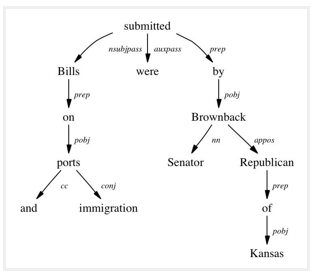

The tree shows that “submitted” is the root word of this sentence, and is linked by two sub-trees (subject and object subtrees). Each subtree is a itself a dependency tree with relations such as – (“Bills” <-> “ports” <by> “proposition” relation), (“ports” <-> “immigration” <by> “conjugation” relation).

This type of tree, when parsed recursively in top-down manner gives grammar relation triplets as output which can be used as features for many nlp problems like entity wise sentiment analysis, actor & entity identification, and text classification. The python wrapper StanfordCoreNLP (by Stanford NLP Group, only commercial license) and NLTK dependency grammars can be used to generate dependency trees.

Part of speech tagging – Apart from the grammar relations, every word in a sentence is also associated with a part of speech (pos) tag (nouns, verbs, adjectives, adverbs etc). The pos tags defines the usage and function of a word in the sentence. H ere is a list of all possible pos-tags defined by Pennsylvania university. Following code using NLTK performs pos tagging annotation on input text. (it provides several implementations, the default one is perceptron tagger)

```

In [ ]:
from nltk import word_tokenize, pos_tag
text = "I am learning Natural Language Processing here"
tokens = word_tokenize(text)
print pos_tag(tokens)

A.Word sense disambiguation: Some language words have multiple meanings according to their usage. For example, in the two sentences below:

I. “Please book my flight for Delhi”

II. “I am going to read this book in the flight”

“Book” is used with different context, however the part of speech tag for both of the cases are different. In sentence I, the word “book” is used as v erb, while in II it is used as no un. (Lesk Algorithm is also us ed for similar purposes)

B.Improving word-based features: A learning model could learn different contexts of a word when used word as the features, however if the part of speech tag is linked with them, the context is preserved, thus making strong features. For example:

Sentence -“book my flight, I will read this book”

Tokens – (“book”, 2), (“my”, 1), (“flight”, 1), (“I”, 1), (“will”, 1), (“read”, 1), (“this”, 1)

Tokens with POS – (“book_VB”, 1), (“my_PRP$”, 1), (“flight_NN”, 1), (“I_PRP”, 1), (“will_MD”, 1), (“read_VB”, 1), (“this_DT”, 1), (“book_NN”, 1)

C. Normalization and Lemmatization: POS tags are the basis of lemmatization process for converting a word to its base form (lemma).

D.Efficient stopword removal : P OS tags are also useful in efficient removal of stopwords.

For example, there are some tags which always define the low frequency / less important words of a language. For example: (IN – “within”, “upon”, “except”), (CD – “one”,”two”, “hundred”), (MD – “may”, “mu st” etc)

3.2 Entity Extraction (Entities as features)

Entities are defined as the most important chunks of a sentence – noun phrases, verb phrases or both. Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing. The applicability of entity detection can be seen in the automated chat bots, content analyzers and consumer insights.
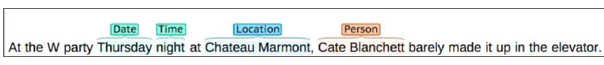

 

Topic Modelling & Named Entity Recognition are the two key entity detection methods in NLP.

A. Named Entity Recognition (NER)

The process of detecting the named entities such as person names, location names, company names etc from the text is called as NER. For example :

Sentence – Sergey Brin, the manager of Google Inc. is walking in the streets of New York.

Named Entities –  ( “person” : “Sergey Brin” ), (“org” : “Google Inc.”), (“location” : “New York”)

A typical NER model consists of three blocks:

Noun phrase identification: This step deals with extracting all the noun phrases from a text using dependency parsing and part of speech tagging.

Phrase classification: This is the classification step in which all the extracted noun phrases are classified into respective categories (locations, names etc). Google Maps API provides a good path to disambiguate locations, Then, the open databases from dbpedia, wikipedia can be used to identify person names or company names. Apart from this, one can curate the lookup tables and dictionaries by combining information from different sources.

Entity disambiguation: Sometimes it is possible that entities are misclassified, hence creating a validation layer on top of the results is useful. Use of knowledge graphs can be exploited for this purposes. The popular knowledge graphs are – Google Knowledge Graph, IBM Watson and Wikipe

B. Topic Modeling

Topic modeling is a process of automatically identifying the topics present in a text corpus, it derives the hidden patterns among the words in the corpus in an unsupervised manner. Topics are defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model results in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Latent Dirichlet Allocation (LDA) is the most popular topic modelling technique, Following is the code to implement topic modeling using LDA in python. For a detailed explanation about its working and implementation, check the complete article here.

In [5]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father." 
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc_complete = [doc1, doc2, doc3]
doc_clean = [doc.split() for doc in doc_complete]

!pip install -U gensim
from gensim import gensim
import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

# Results 
print(ldamodel.print_topics())

  Stored in directory: C:\Users\Garima\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Stored in directory: C:\Users\Garima\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


ImportError: cannot import name 'gensim'

C.  N-Grams as Features

A combination of N words together are called N-Grams. N grams (N > 1) are generally more informative as compared to words (Unigrams) as features. Also, bigrams (N = 2) are considered as the most important features of all the others. The following code generates bigram of a text.

In [6]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

In [7]:
generate_ngrams('this is a sample text', 2)

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

3.3 Statistical Features

Text data can also be quantified directly into numbers using several techniques described in this section:

A.  Term Frequency – Inverse Document Frequency (TF – IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:

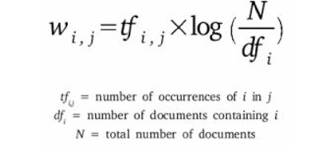

    

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is sample document.', 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)
print()

  (0, 7)	0.58448290102
  (0, 2)	0.58448290102
  (0, 4)	0.444514311537
  (0, 1)	0.345205016865
  (1, 1)	0.385371627466
  (1, 0)	0.652490884513
  (1, 3)	0.652490884513
  (2, 4)	0.444514311537
  (2, 1)	0.345205016865
  (2, 6)	0.58448290102
  (2, 5)	0.58448290102


he model creates a vocabulary dictionary and assigns an index to each word. Each row in the output contains a tuple (i,j) and a tf-idf value of word at index j in document i.

B. Count / Density / Readability Features

Count or Density based features can also be used in models and analysis. These features might seem trivial but shows a great impact in learning models. Some of the features are: Word Count, Sentence Count, Punctuation Counts and Industry specific word counts.

3.4 Word Embedding (text vectors)

Word embedding is the modern way of representing words as vectors. The aim of word embedding is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are widely used in deep learning models such as Convolutional Neural Networks and Recurrent Neural Networks.

Word2Vec and GloVe are the two popular models to create word embedding of a text. These models takes a text corpus as input and produces the word vectors as output.

Word2Vec model is composed of preprocessing module, a shallow neural network model called Continuous Bag of Words and another shallow neural network model called skip-gram. These models are widely used for all other nlp problems. It first constructs a vocabulary from the training corpus and then learns word embedding representations. Following code using gensim package prepares the word embedding as the vectors.

In [14]:
from gensim.models import Word2Vec
sentences = [['data', 'science'], ['vidhya', 'science', 'data', 'analytics'],['machine', 'learning'], ['deep', 'learning']]

# train the model on your corpus  
model = Word2Vec(sentences, min_count = 1)

print(model.similarity('data', 'science'))

print(model['learning'])

0.085125
[  3.32898949e-03   1.00852747e-03   2.81128567e-03   2.08012923e-03
   6.55579672e-04   3.22232838e-04  -4.85159038e-03   4.51748120e-03
  -3.95241100e-03  -7.04957871e-04   4.12353640e-03   1.02482212e-03
   9.04743734e-04   4.25621448e-03   1.73936936e-03   3.26392264e-03
  -2.68184184e-03  -4.70670033e-03  -2.26248917e-03   6.55804935e-04
   3.08021880e-03  -4.24077082e-03   4.82901977e-03   2.17121816e-03
  -1.11960934e-03   2.16211207e-04   3.68688954e-03   2.50911713e-03
  -7.38137926e-04   1.13321963e-04  -2.04131962e-03  -3.36465426e-03
   4.51921625e-03  -1.11828255e-03  -5.08353522e-04   3.66202509e-03
  -1.64001738e-03  -1.88765896e-03   2.13054125e-03  -1.78606366e-03
   3.67516582e-03   4.44791652e-03   1.59512775e-03  -2.48027546e-03
   3.60563514e-03  -2.71166768e-03  -3.49205127e-03  -2.06004316e-03
  -7.19003438e-04  -2.47893296e-03   3.49924783e-03   1.44703523e-03
  -1.22139067e-03  -7.50669496e-05   1.91432738e-03  -4.67276620e-03
   2.23244846e-04  -7.075

C:\Users\Garima\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
C:\Users\Garima\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


They can be used as feature vectors for ML model, used to measure text similarity using cosine similarity techniques, words clustering and text classification techniques.

### 4. Important tasks of NLP

This section talks about different use cases and problems in the field of natural language processing.

4.1 Text Classification

Text classification is one of the classical problem of NLP. Notorious examples include – Email Spam Identification, topic classification of news, sentiment classification and organization of web pages by search engines.

Text classification, in common words is defined as a technique to systematically classify a text object (document or sentence) in one of the fixed category. It is really helpful when the amount of data is too large, especially for organizing, information filtering, and storage purposes.

A typical natural language classifier consists of two parts: (a) Training (b) Prediction as shown in image below. Firstly the text input is processes and features are created. The machine learning models then learn these features and is used for predicting against the new text.

In [17]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
                   ('I am exhausted of this work.', 'Class_B'),
                   ("I can't cooperate with this", 'Class_B'),
                   ('He is my badest enemy!', 'Class_B'),
                   ('My management is poor.', 'Class_B'),
                   ('I love this burger.', 'Class_A'),
                   ('This is an brilliant place!', 'Class_A'),
                   ('I feel very good about these dates.', 'Class_A'),
                   ('This is my best work.', 'Class_A'),
                   ("What an awesome view", 'Class_A'),
                   ('I do not like this dish', 'Class_B')]
test_corpus = [
                ("I am not feeling well today.", 'Class_B'), 
                ("I feel brilliant!", 'Class_A'), 
                ('Gary is a friend of mine.', 'Class_A'), 
                ("I can't believe I'm doing this.", 'Class_B'), 
                ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]

model = NBC(training_corpus) 

print(model.classify("Their codes are amazing."))

print(model.classify("I don't like their computer."))

print(model.accuracy(test_corpus))


Class_A
Class_B
0.8333333333333334


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm

# preparing data for SVM model (using the same training_corpus, test_corpus from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
    train_data.append(row[0])
    train_labels.append(row[1])

test_data = [] 
test_labels = [] 
for row in test_corpus:
    test_data.append(row[0]) 
    test_labels.append(row[1])
    
# Create feature vectors 
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)
# Apply model on test data 
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear 
model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_labels) 
prediction = model.predict(test_vectors)

print (classification_report(test_labels, prediction))


              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

   micro avg       0.50      0.50      0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



#### some tips that I wrote about improving the text classification accuracy

4.2 Text Matching / Similarity

One of the important areas of NLP is the matching of text objects to find similarities. Important applications of text matching includes automatic spelling correction, data de-duplication and genome analysis etc.

A. Levenshtein Distance – The Levenshtein distance between two strings is defined as the minimum number of edits needed to transform one string into the other, with the allowable edit operations being insertion, deletion, or substitution of a single character. Following is the implementation for efficient memory computations.

In [29]:
def levenshtein(s1,s2): 
    if len(s1) > len(s2):
        s1,s2 = s2,s1 
    distances = range(len(s1) + 1) 
    for index2,char2 in enumerate(s2):
        newDistances = [index2+1]
        for index1,char1 in enumerate(s1):
            if char1 == char2:
                newDistances.append(distances[index1]) 
            else:
                 newDistances.append(1 + min((distances[index1], distances[index1+1], newDistances[-1]))) 
        distances = newDistances 
    return distances[-1]

print(levenshtein("analyze","analyse"))

2


B. Phonetic Matching – A Phonetic matching algorithm takes a keyword as input (person’s name, location name etc) and produces a character string that identifies a set of words that are (roughly) phonetically similar. It is very useful for searching large text corpuses, correcting spelling errors and matching relevant names. Soundex and Metaphone are two main phonetic algorithms used for this purpose. Python’s module Fuzzy is used to compute soundex strings for different words, for example –

In [35]:
!pip install -U scikit-fuzzy
import fuzzy 
soundex = fuzzy.Soundex(4) 
print(soundex('ankit'))
print(soundex('aunkit'))


  Stored in directory: C:\Users\Garima\AppData\Local\pip\Cache\wheels\81\d9\eb\b8321c08339f51be3e991e7ae45b9673270cb8ca8271482ab1
Successfully built scikit-fuzzy


ModuleNotFoundError: No module named 'fuzzy'

C. Flexible String Matching – A complete text matching system includes different algorithms pipelined together to compute variety of text variations. Regular expressions are really helpful for this purposes as well. Another common techniques include – exact string matching, lemmatized matching, and compact matching (takes care of spaces, punctuation’s, slangs etc).

D. Cosine Similarity – W hen the text is represented as vector notation, a general cosine similarity can also be applied in order to measure vectorized similarity. Following code converts a text to vectors (using term frequency) and applies cosine similarity to provide closeness among two text.

In [46]:
import math
from collections import Counter
def get_cosine(vec1, vec2):
    common = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()]) 
    sum2 = sum([vec2[x]**2 for x in vec2.keys()]) 
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
   
    if not denominator:
        return 0.0 
    else:
        return float(numerator) / denominator

def text_to_vector(text): 
    words = text.split() 
    return Counter(words)

text1 = 'This is NLP learing code' 
text2 = 'This is a great way of  learning NLP code'

vector1 = text_to_vector(text1) 
vector2 = text_to_vector(text2) 
cosine = get_cosine(vector1, vector2)
cosine

0.5962847939999439

4.3 Coreference Resolution

Coreference Resolution is a process of finding relational links among the words (or phrases) within the sentences. Consider an example sentence: ” Donald went to John’s office to see the new table. He looked at it for an hour.“

Humans can quickly figure out that “he” denotes Donald (and not John), and that “it” denotes the table (and not John’s office). Coreference Resolution is the component of NLP that does this job automatically. It is used in document summarization, question answering, and information extraction. Stanford CoreNLP provides a python wrapper for commercial purposes.

 

4.4 Other NLP problems / tasks

Text Summarization – Given a text article or paragraph, summarize it automatically to produce most important and relevant sentences in order.
Machine Translation – Automatically translate text from one human language to another by taking care of grammar, semantics and information about the real world, etc.
Natural Language Generation and Understanding – Convert information from computer databases or semantic intents into readable human language is called language generation. Converting chunks of text into more logical structures that are easier for computer programs to manipulate is called language understanding.
Optical Character Recognition – Given an image representing printed text, determine the corresponding text.
Document to Information – This involves parsing of textual data present in documents (websites, files, pdfs and images) to analyzable and clean format.
 

5. Important Libraries for NLP (python)

Scikit-learn: Machine learning in Python
Natural Language Toolkit (NLTK): The complete toolkit for all NLP techniques.
Pattern – A web mining module for the with tools for NLP and machine learning.
TextBlob – Easy to use nl p tools API, built on top of NLTK and Pattern.
spaCy – Industrial strength N LP with Python and Cython.
Gensim – Topic Modelling for Humans
Stanford Core NLP – NLP services and packages by Stanford NLP Group.